In [115]:
import numpy as np # forlinear algebra
import matplotlib.pyplot as plt #for plotting things
import os,os.path
from PIL import Image
#print(os.listdir("C://Users//syerekar//Videos//OpenCv//Computer-Vision-with-Python//Project-xray"))

# Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix
import cv2
import glob
from pathlib import Path
import pandas as pd
import seaborn as sns

In [88]:

#pip install seaborn

In [45]:
mainDIR = os.listdir('C://Users//syerekar//Videos//OpenCv//Computer-Vision-with-Python//Project-xray//chest_xray//chest_xray')
print(mainDIR)

['.DS_Store', 'test', 'train', 'val']


In [154]:
train_folder= 'C://Users//syerekar//Videos//OpenCv//Computer-Vision-with-Python//Project-xray//chest_xray//chest_xray//train//'
val_folder = 'C://Users//syerekar//Videos//OpenCv//Computer-Vision-with-Python//Project-xray//chest_xray//chest_xray/val//'
test_folder = 'C://Users//syerekar//Videos//OpenCv//Computer-Vision-with-Python//Project-xray//chest_xray//chest_xray/test//'

In [109]:
#Normal
img1_n = cv2.imread('C:/Users/syerekar/Videos/OpenCv/Computer-Vision-with-Python/Project-xray/chest_xray/chest_xray/train/NORMAL/IM-0115-0001.jpeg')
img1_n = cv2.cvtColor(img1_n,cv2.COLOR_BGR2RGB)
img1_n = cv2.resize(img1_n,(1500,1500))
img2_n = cv2.imread('C:/Users/syerekar/Videos/OpenCv/Computer-Vision-with-Python/Project-xray/chest_xray/chest_xray/train/NORMAL/IM-0119-0001.jpeg')
img2_n = cv2.cvtColor(img2_n,cv2.COLOR_BGR2RGB)
img2_n = cv2.resize(img2_n,(1500,1500))
img3_n = cv2.imread('C:/Users/syerekar/Videos/OpenCv/Computer-Vision-with-Python/Project-xray/chest_xray/chest_xray/train/NORMAL/IM-0115-0001.jpeg')
img3_n = cv2.cvtColor(img3_n,cv2.COLOR_BGR2RGB)
img3_n = cv2.resize(img3_n,(1500,1500))

#Pneumonia
img1_p = cv2.imread('C:/Users/syerekar/Videos/OpenCv/Computer-Vision-with-Python/Project-xray/chest_xray/chest_xray/train/PNEUMONIA/person2_bacteria_4.jpeg')
img1_p = cv2.cvtColor(img1_p,cv2.COLOR_BGR2RGB)
img1_p = cv2.resize(img1_p,(1500,1500))
img2_p = cv2.imread('C:/Users/syerekar/Videos/OpenCv/Computer-Vision-with-Python/Project-xray/chest_xray/chest_xray/train/PNEUMONIA/person16_bacteria_53.jpeg')
img2_p = cv2.cvtColor(img2_p,cv2.COLOR_BGR2RGB)
img2_p = cv2.resize(img2_p,(1500,1500))
img3_p = cv2.imread('C:/Users/syerekar/Videos/OpenCv/Computer-Vision-with-Python/Project-xray/chest_xray/chest_xray/train/PNEUMONIA/person5_bacteria_16.jpeg')
img3_p = cv2.cvtColor(img3_p,cv2.COLOR_BGR2RGB)
img3_p = cv2.resize(img3_p,(1500,1500))




In [147]:
Dir_Norm='C://Users//syerekar//Videos//OpenCv//Computer-Vision-with-Python//Project-xray//chest_xray//chest_xray/train/NORMAL'
Norm_count = len([name for name in os.listdir(Dir_Norm) if os.path.isfile(os.path.join(Dir_Norm,name))])

Dir_Pne='C://Users//syerekar//Videos//OpenCv//Computer-Vision-with-Python//Project-xray//chest_xray//chest_xray/train/PNEUMONIA'
Pne_count = len([name for name in os.listdir(Dir_Pne) if os.path.isfile(os.path.join(Dir_Pne,name))])

Total_cases = Norm_count + Pne_count

print('Normal Cases:',Norm_count)
print('Pneumonia Cases:',Pne_count)
print('Total Cases:',Total_cases)

Normal Cases: 1342
Pneumonia Cases: 3876
Total Cases: 5218


The data is highly imbalanced. We have almost with thrice pneumonia cases here as compared to the normal cases. This situation is very normal when it comes to medical data. The data will always be imbalanced. either there will be too many normal cases or there will be too many cases with the disease.

Let's look at how a normal case is different from that of a pneumonia case. We will look at somes samples from our training data itself.

Text(0.5,1,'Pneumonia')

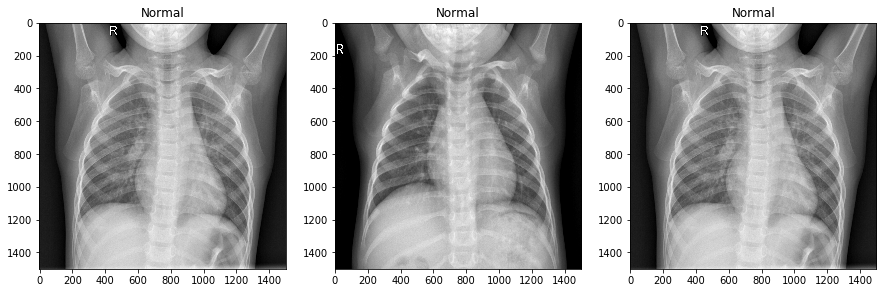

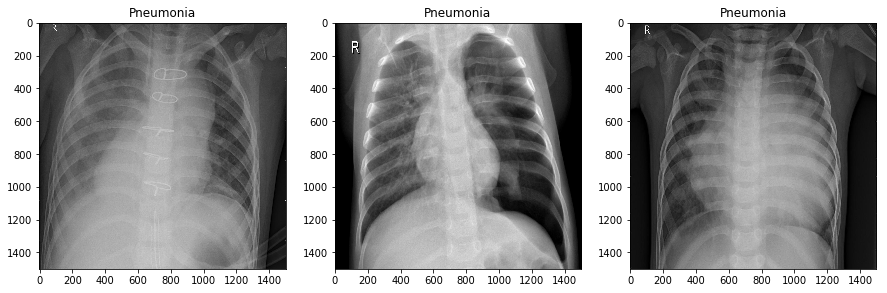

In [148]:
fig = plt.figure(figsize=(15,15))

ax1 = fig.add_subplot(131)
ax1.imshow(img1_n)
ax1.set_title("Normal")

ax2 = fig.add_subplot(132)
ax2.imshow(img2_n)
ax2.set_title("Normal")

ax3 = fig.add_subplot(133)
ax3.imshow(img3_n)
ax3.set_title("Normal")



fig = plt.figure(figsize=(15,15))

ax1 = fig.add_subplot(131)
ax1.imshow(img1_p)
ax1.set_title("Pneumonia")

ax2 = fig.add_subplot(132)
ax2.imshow(img2_p)
ax2.set_title("Pneumonia")

ax3 = fig.add_subplot(133)
ax3.imshow(img3_p)
ax3.set_title("Pneumonia")

Here are some cases where we won't be able to differentiate between a normal case and a pneumonia case with the naked eye. There is one case in the above plot, at least for me ,which is too much confusing.

In [155]:
from keras.preprocessing.image import ImageDataGenerator

In [156]:
image_gen = ImageDataGenerator(rotation_range=30, # rotate the image 30 degrees
                               width_shift_range=0.1, # Shift the pic width by a max of 10%
                               height_shift_range=0.1, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.2, # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.2, # Zoom in by 20% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

In [157]:
image_gen.flow_from_directory(train_folder)

Found 5216 images belonging to 2 classes.


In [159]:
image_gen.flow_from_directory(test_folder)

Found 624 images belonging to 2 classes.


In [160]:
#Resize image
image_shape = (150,150,3)


In [161]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [162]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary, 0=cat , 1=dog
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [163]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)             0         
__________

In [164]:
batch_size = 16

train_image_gen = image_gen.flow_from_directory(train_folder,
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 5216 images belonging to 2 classes.


In [165]:
test_image_gen = image_gen.flow_from_directory(test_folder,
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 624 images belonging to 2 classes.


In [166]:
train_image_gen.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [167]:
test_image_gen.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [168]:
import warnings
warnings.filterwarnings('ignore')

In [169]:
results = model.fit_generator(train_image_gen,epochs=40,
                              steps_per_epoch=150,
                              validation_data=test_image_gen,
                             validation_steps=12)

Epoch 1/40
150/150 [==============================] - 94s 628ms/step - loss: 0.5910 - acc: 0.7304 - val_loss: 0.7168 - val_acc: 0.6266
Epoch 2/40
150/150 [==============================] - 86s 572ms/step - loss: 0.4404 - acc: 0.7846 - val_loss: 0.7649 - val_acc: 0.6266
Epoch 3/40
150/150 [==============================] - 96s 642ms/step - loss: 0.3628 - acc: 0.8367 - val_loss: 0.7366 - val_acc: 0.6891
Epoch 4/40
150/150 [==============================] - 83s 553ms/step - loss: 0.3601 - acc: 0.8433 - val_loss: 0.6736 - val_acc: 0.7436
Epoch 5/40
150/150 [==============================] - 79s 526ms/step - loss: 0.3270 - acc: 0.8608 - val_loss: 0.4802 - val_acc: 0.7837
Epoch 6/40
150/150 [==============================] - 73s 486ms/step - loss: 0.2999 - acc: 0.8683 - val_loss: 0.4187 - val_acc: 0.8061
Epoch 7/40
150/150 [==============================] - 79s 529ms/step - loss: 0.2929 - acc: 0.8704 - val_loss: 0.5767 - val_acc: 0.7292
Epoch 8/40
150/150 [==============================] - 9

In [170]:
import numpy as np
from keras.preprocessing import image

val_img = 'C:/Users/syerekar/Videos/OpenCv/Computer-Vision-with-Python/Project-xray/chest_xray/chest_xray/val/PNEUMONIA/person1949_bacteria_4880.jpeg'
# Taking a sample image from Pnemonia dataset for prediction

val_img = image.load_img(val_img, target_size=(150, 150))

val_img = image.img_to_array(val_img)

val_img = np.expand_dims(val_img, axis=0)
val_img = val_img/255

In [171]:
prediction_prob = model.predict(val_img)

In [172]:
# Output prediction
print(f'Probability that image is a PNEUMONIA is: {prediction_prob} ')

Probability that image is a PNEUMONIA is: [[0.9265613]] 


In [173]:
model.predict_classes(val_img)

array([[1]])

In [175]:
#model.predict_classes(val_img)

model.save('Pneumonia.h5')

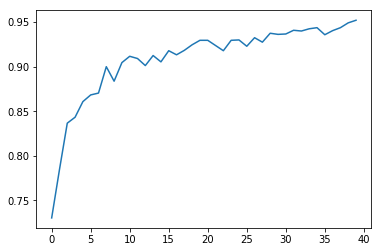

In [176]:
plt.plot(results.history['acc'])